In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
from locale import atof
from dateutil import parser
from datetime import datetime

In [2]:
# Import data
df = pd.read_csv('data/mass_shootings.csv')
df_reworked = pd.read_csv('data/mass_shootings_reworked.csv')
df_shooterData = pd.read_csv('data/mass_shooters.csv')

In [3]:
# Count number of occurances
df.State.count()

156

In [4]:
# Sort occurances by state
df_stateOccurances = pd.value_counts(df['State'].values, sort=True)
df_stateOccurances = df_stateOccurances.reset_index()
df_stateOccurances = df_stateOccurances.rename(columns = {'index':'state', 0:'count'})

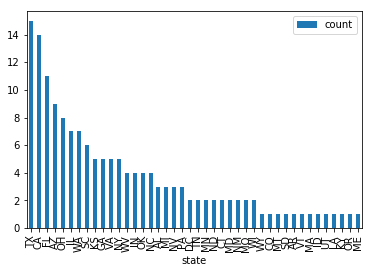

In [5]:
# Graph by state
df_stateOccurances.plot(kind='bar',x='state',y='count')

No         89
Yes        66
Unknown     1
dtype: int64

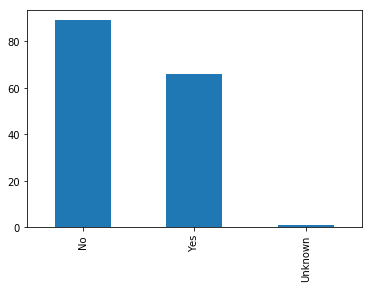

In [6]:
# Count number of shooter suicides
# df_stateOccurances = pd.value_counts(df['State'].values, sort=True)
df_suicideCount = pd.value_counts(df['Shooter Suicide'].values)

# Graph
df_suicideCount.plot(kind='bar')
df_suicideCount

In [7]:
# Count number of guns used 

# Make a new dataframe
df_weaponsUsed = pd.DataFrame()

# Add summed amounts of each gun type to dataframe
df_weaponsUsed['handgun'] = [df['Handgun'].sum()]
df_weaponsUsed['assult weapon'] = [df['Assault Weapon'].sum()]
df_weaponsUsed['other'] = [df['Other'].sum()]
df_weaponsUsed['unknown'] = [df['Unknown'].sum()]

df_weaponsUsed

,handgun,assult weapon,other,unknown
0,139,17,37,33


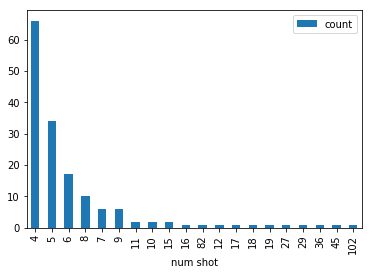

In [8]:
# Count number of incidents by amount of victims
df_totalShot = pd.value_counts(df['TOTAL SHOT (Not Including Shooter)'].values, sort=True)
df_totalShot = df_totalShot.reset_index()
df_totalShot = df_totalShot.rename(columns = {'index':'num shot', 0:'count'})
df_totalShot.to_

# Graph
df_totalShot.plot(kind='bar',x='num shot',y='count')

In [9]:
# Average number of vitims per incident
df_totalShot['count'].mean()

7.7999999999999998

,gender,count
0,Male,146
1,Unknown,20
2,Female,10


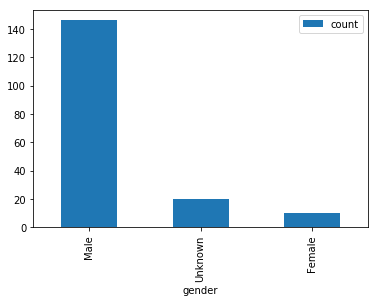

In [10]:
# Breakdown gender data
df_shooterGenderData = pd.value_counts(df_shooterData['Gender'].values, sort=True)
df_shooterGenderData = df_shooterGenderData.reset_index()
df_shooterGenderData = df_shooterGenderData.rename(columns = {'index':'gender', 0:'count'})

# Graph
df_shooterGenderData.plot(kind='bar',x='gender',y='count')
df_shooterGenderData

In [11]:
# Function to remove unknowns and NaNs from cells 
def removeUnknown(item):
    if item == 'Unknown':
        return 'NA'
    elif item == 'nan':
        return 'NA'
    else:
        return item

# Duplicate shooter data
df_shooterAgeData = df_shooterData

# Apply removeUnknown function to age column
df_shooterAgeData['Age'] = df_shooterData['Age'].apply(removeUnknown)
# df_shooterAgeData

In [12]:
# Filter out ages that are not numbers
df_shooterFilteredAge = df_shooterData[df_shooterData['Age'] != 'NA']
df_shooterFilteredAge.to_csv('exported_data/df_shooterFilteredAge.csv')